Fourier transform and filtering

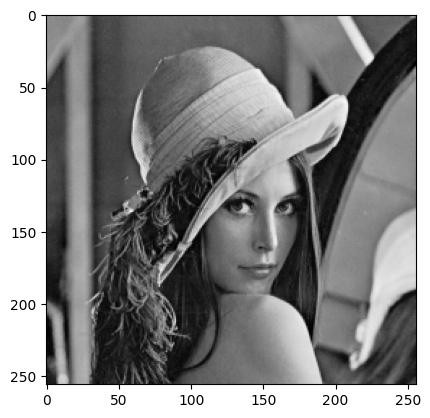

In [19]:
import cv2
import matplotlib.pyplot as plt
image=plt.imread('LabImages/Image/lena.bmp')
plt.imshow(image,cmap=plt.cm.gray)
plt.show()

In [12]:
import numpy as np
import cv2
image_fourier=np.fft.fft2(image)
IF=np.fft.fftshift(image_fourier)
IF

array([[ 1193.           +0.j        , -1547.93193696 -816.80493115j,
          263.82494625 +151.81816112j, ...,
         -440.21569293 -224.43960369j,   263.82494625 -151.81816112j,
        -1547.93193696 +816.80493115j],
       [ -841.81130697 +179.77083923j,   661.74136777 -127.58097j   ,
         -864.36278394-1277.72247695j, ...,
          826.79880124 +963.89113553j,   407.00799811 -637.87016032j,
         -112.57955355 -309.24998198j],
       [  658.62215812 +261.48435624j,  -590.83021367 +131.91096016j,
          630.06480821 +431.42323342j, ...,
         -241.18536303 -632.12947901j,  -269.872495  +1097.62882629j,
           67.74965935 +641.42365526j],
       ...,
       [  359.09207107 -233.69148935j,   253.72407355  +45.38200497j,
         -247.22648284 -283.84492965j, ...,
         -302.14750425 -600.69928479j,   -87.67633615 +604.40304479j,
          411.40857507 +124.91957802j],
       [  658.62215812 -261.48435624j,    67.74965935 -641.42365526j,
         -269.872495  

[[1423249.         3063263.57700245   92652.35630741 ...  244162.99200933
    92652.35630741 3063263.57700244]
 [ 740963.83118527  454178.54172327 2379697.75036921 ... 1612682.37889981
   572533.85195199  108309.70723192]
 [ 502157.21572594  366480.8427981   583107.66888712 ...  457758.05757533
  1277620.20386909  416014.32186643]
 ...
 [ 183558.82770123   66435.43187315  141688.87790641 ...  452132.74507575
   372990.18047584  184861.91661357]
 [ 502157.21572594  416014.32186643 1277620.20386909 ... 4374664.55953885
   583107.66888711  366480.8427981 ]
 [ 740963.83118527  108309.70723192  572533.85195199 ... 5644668.92223648
  2379697.75036922  454178.54172327]]


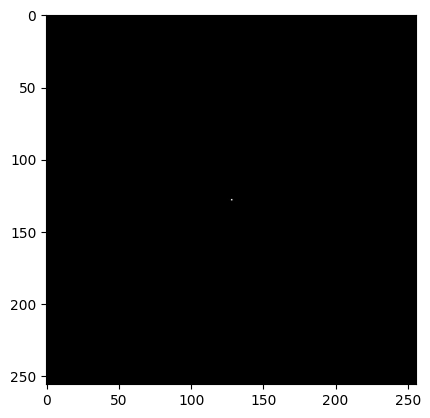

-1

In [21]:
import cv2
real_part=IF.real
imaginary_part=IF.imag
power_spectrum=np.power(real_part,2)+np.power(imaginary_part,2)
print(power_spectrum)
# plt.imshow(power_spectrum,cmap=plt.cm.gray)
# plt.show()
cv2.imshow('power_spectrum',power_spectrum)
cv2.waitKey(0)

In [24]:
phase=np.arctan(imaginary_part,real_part)
print(phase)
cv2.imshow('phase',phase)
cv2.waitKey(0)

[[ 0.         -1.56957204  1.56420959 ... -1.56634081 -1.56420959
   1.56957204]
 [ 1.56523375 -1.56295833 -1.57001368 ...  1.56975887 -1.56922861
  -1.56756271]
 [ 1.56697202  1.5632156   1.56847842 ... -1.56921437  1.56988527
   1.5692373 ]
 ...
 [-1.56651721  1.54876473 -1.56727329 ... -1.5691316   1.5691418
   1.56279135]
 [-1.56697202 -1.5692373  -1.56988527 ...  1.57022237 -1.56847842
  -1.5632156 ]
 [-1.56523375  1.56756271  1.56922861 ... -1.57037399  1.57001368
   1.56295833]]


-1

In [26]:
H,W=image_fourier.shape
def ideal_low_pass_filter(R):
    mask=np.zeros([H,W],dtype=np.float64)
    for i in range(0,H):
        for j in range(0,W):
            if(np.power(i-H/2,2)+np.power(j-W/2,2)<=np.power(R,2)):
                mask[i][j]=1
    return mask

[[ 0.          2.72692537  5.42983315 ... -8.08493782 -5.42983315
  -2.72692537]
 [ 0.53946255  3.26689644  5.96999354 ... -7.54881304 -4.89232881
  -2.18829265]
 [ 1.07177674  3.80104195  6.50561327 ... -7.02382731 -4.36465007
  -1.65814851]
 ...
 [-1.58990394  1.14351973  3.85382936 ... -9.68799191 -7.02957857
  -4.32229423]
 [-1.07177674  1.65814851  4.36465007 ... -9.16173888 -6.50561327
  -3.80104195]
 [-0.53946255  2.18829265  4.89232881 ... -8.62499533 -5.96999354
  -3.26689644]]


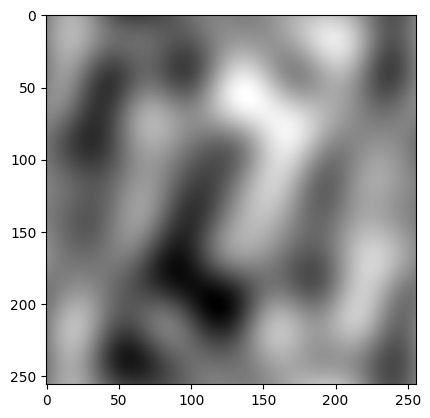

-1

In [33]:
filter_IF=IF*ideal_low_pass_filter(5)
shift_filter_IF=np.fft.ifftshift(filter_IF)
inverse_image=np.fft.ifft2(shift_filter_IF)
print(inverse_image.real)
plt.imshow(inverse_image.real,cmap=plt.cm.gray)
plt.show()
cv2.imshow('inverse',inverse_image.real)
cv2.waitKey(0)